In [1]:
# PLEASE NOTE THAT THIS CODE INCLUDES HARD_CODED FILE PATHS FROM MY COMPUTER. 
# THIS CODE WILL NOT WORK ON YOUR MACHINE, AS I HAVE DOWNLOADED ALL IMAGES 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.io as io
import copy

In [3]:
# The following have cosmic rays in them
# They are all in the folder 085_SPKMVLFLP

# W1600547742
# W1600549826 
# W1600551910
# W1600577960

In [4]:
cosmic_ray_list = ["W1600549826", "W1600551910", "W1600547742"]
rpjb_list = glob.glob('../../../data/2023_rpjb/good/085_SPKMVLFLP/*')
path_list = []

for path in rpjb_list:
    # This is fun. split the string by /. Grab the last item. 
    # Then split the stirng by _ and grab the first itme. Thatst the opus code. 
    if path.split('/')[-1].split('_')[0] in cosmic_ray_list:
        path_list.append(path)

In [5]:
path_list

['../../../data/2023_rpjb/good/085_SPKMVLFLP/W1600549826_1_CALIB.rpjb',
 '../../../data/2023_rpjb/good/085_SPKMVLFLP/W1600551910_1_CALIB.rpjb',
 '../../../data/2023_rpjb/good/085_SPKMVLFLP/W1600547742_1_CALIB.rpjb']

In [6]:
def remove_cosmic_rays(pixel_values):
    m,n=pixel_values.shape

    for i in range(0, m):
        top20 = np.sort(pixel_values[i])[-21:]
        for j in np.argsort(pixel_values[i])[-21:]:
            pixel_values[i,j] = top20[0]        

    return pixel_values

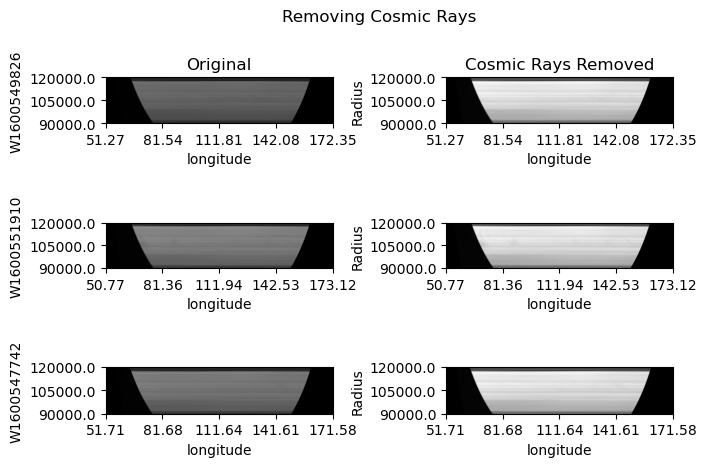

In [16]:
import sys
sys.path.insert(1, '../../../src')
from spoketools import lable_figure

fig, axs = plt.subplots(3, 2)
fig.suptitle('Removing Cosmic Rays')
fig.tight_layout()
fig.subplots_adjust(wspace=.5)


for thumb_cosmic_ray in path_list:
    idl = io.readsav(thumb_cosmic_ray)
    pixel_values = idl.rrpi
    pixel_values=copy.copy(pixel_values)

    #original
    lable_figure(idl, pixel_values, axs[path_list.index(thumb_cosmic_ray), 0])


    # axs[path_list.index(thumb_cosmic_ray), 0].set(ylabel=)    

    pixel_values = remove_cosmic_rays(pixel_values)

    #Cosmic Rays Removed 
    lable_figure(idl, pixel_values, axs[path_list.index(thumb_cosmic_ray), 1])


    # plt.imshow(pixel_values, cmap='gray', origin='lower')
    # plt.show()
axs[0, 0].set(ylabel='W1600549826')
axs[1, 0].set(ylabel='W1600551910')
axs[2, 0].set(ylabel='W1600547742')



axs[0,0].set_title('Original')
axs[0,1].set_title('Cosmic Rays Removed')


plt.show()